# Using dstoolbox visualization

## Table of contents

1. [Nodes and edges of a pipeline](#Nodes-and-edges-of-a-pipeline)
2. [Visualizing a pipeline](#Visualizing-a-pipeline)

In [1]:
from pprint import pprint

In [2]:
from IPython.display import Image
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

In [3]:
from dstoolbox.utils import get_nodes_edges
from dstoolbox.visualization import make_graph

## Nodes and edges of a pipeline

Every sklearn `Pipeline` and `FeatureUnion` can be seen as a graph. Sometimes, it's useful to get an explicit graph structure of your sklearn model, that is, it's nodes and edges. Those can be obtained by `dstoolbox`'s `get_nodes_and_edges`:

In [4]:
my_pipe = Pipeline([
    ('step0', FunctionTransformer()),
    ('step1', FeatureUnion([
        ('feat0', FunctionTransformer()),
        ('feat1', FunctionTransformer()),
    ])),
    ('step2', FunctionTransformer()),
])

In [5]:
nodes, edges = get_nodes_edges('my_pipe', my_pipe)

In [6]:
pprint(nodes)

{'my_pipe': Pipeline(steps=[('step0', FunctionTransformer(accept_sparse=False, func=None, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=True)), ('step1', FeatureUnion(n_jobs=1,
       transformer_list=[('feat0', FunctionTransformer(accept_sparse=False, func=None, inv_kw_args=None,
 ...nc=None, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=True))]),
 'step0': FunctionTransformer(accept_sparse=False, func=None, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=True),
 'step1': FeatureUnion(n_jobs=1,
       transformer_list=[('feat0', FunctionTransformer(accept_sparse=False, func=None, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=True)), ('feat1', FunctionTransformer(accept_sparse=False, func=None, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=True))],
       transformer_weights=None),
 'step1__feat0': Fu

In [7]:
pprint(edges)

[('my_pipe', 'step0'),
 ('step0', 'step1'),
 ('step1__feat1', 'step2'),
 ('step1__feat0', 'step2'),
 ('step1', 'step1__feat0'),
 ('step1', 'step1__feat1')]


## Visualizing a pipeline

One application of having the graph structure of your model is that you can use existing libraries to plot that structure. For convenience, `dstoolbox` implements a function that does this, `make_graph`. Using this, you get a `pydotplus` graph, which you can plot to your notebook or save in a file using `dstoolbox.visualiziation.save_graph_to_file`.

*Note*: Using this requires additional packages not covered by `dstoolbox`. Specifically, you need to install `pydotplus`  and `graphviz`.

In [8]:
my_pipe = Pipeline([
    ('step1', FunctionTransformer()),
    ('step2', FunctionTransformer()),
    ('step3', FeatureUnion([
        ('feat3_1', FunctionTransformer()),
        ('feat3_2', Pipeline([
            ('step10', FunctionTransformer()),
            ('step20', FeatureUnion([
                ('p', FeatureUnion([
                    ('p0', FunctionTransformer()),
                    ('p1', FunctionTransformer()),
                ])),
                ('q', FeatureUnion([
                    ('q0', FunctionTransformer()),
                    ('q1', FunctionTransformer()),
                ])),
            ])),
            ('step30', StandardScaler()),
        ])),
        ('feat3_3', FeatureUnion([
            ('feat10', FunctionTransformer()),
            ('feat11', FunctionTransformer()),
        ])),
    ])),
    ('step4', StandardScaler()),
    ('step5', FeatureUnion([
        ('feat5_1', FunctionTransformer()),
        ('feat5_2', FunctionTransformer()),
        ('feat5_3', FunctionTransformer()),
    ])),
    ('step6', StandardScaler()),
])

In [9]:
graph = make_graph('my pipe', my_pipe)

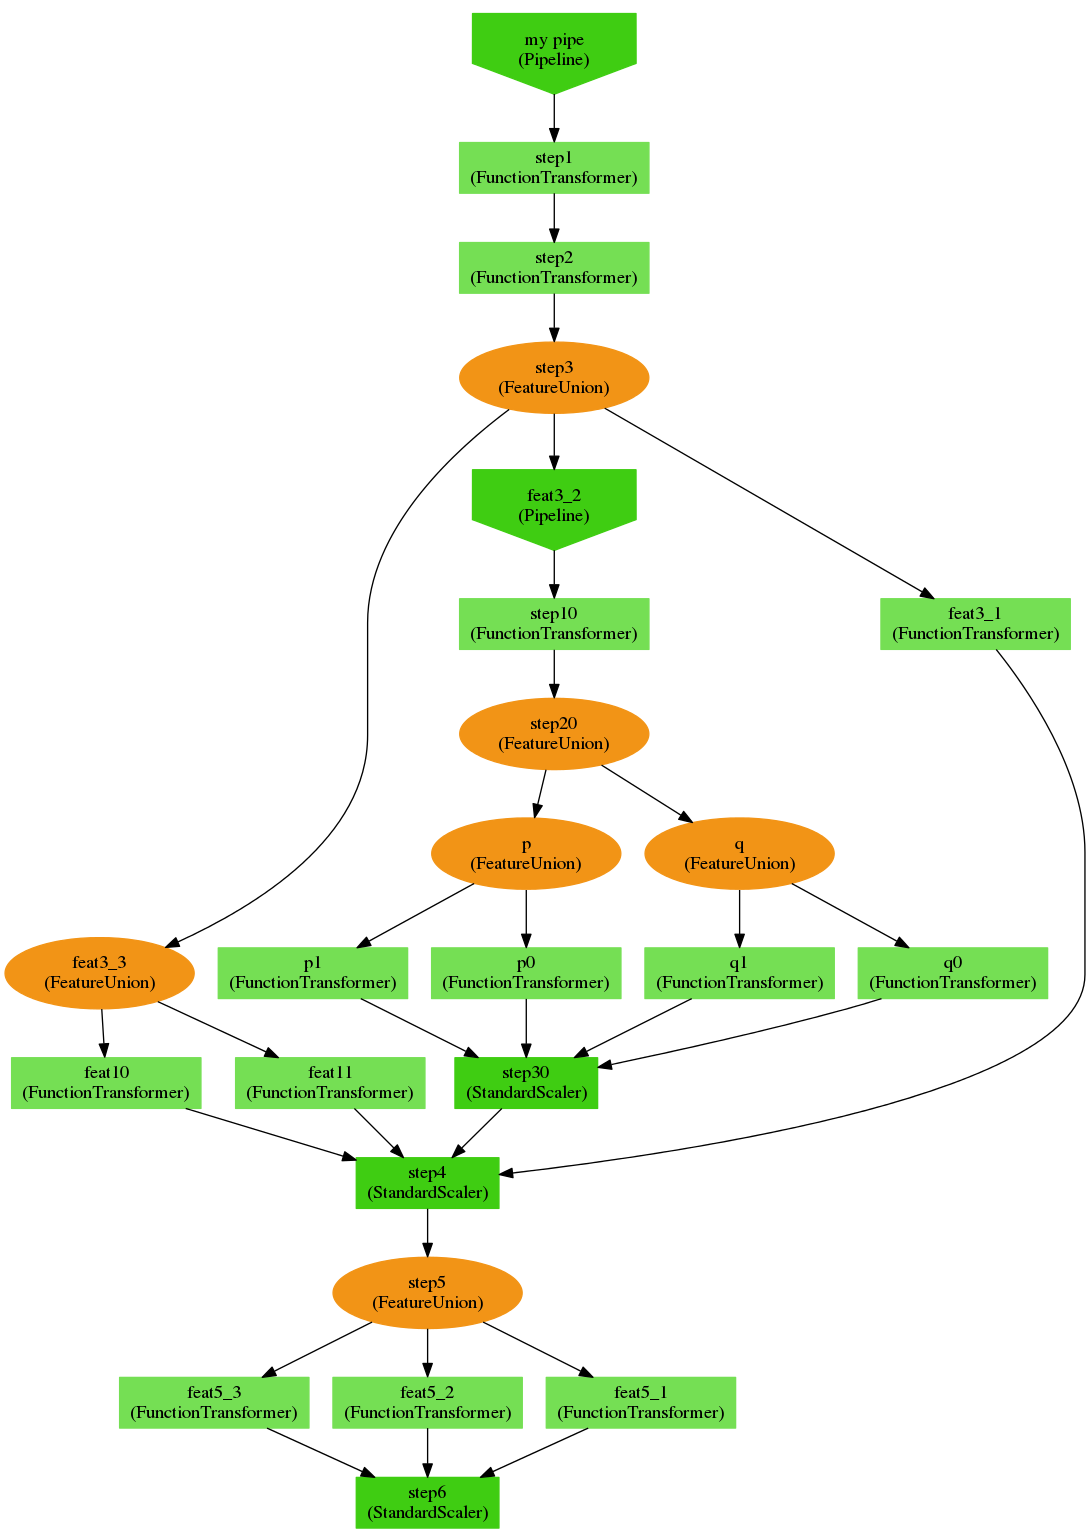

In [10]:
Image(graph.create_png())